In [1]:
import pandas as pd
import numpy as np
url = "https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv"
df = pd.read_csv(url)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


In [2]:
df = df.dropna()
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


# MODO 1 - A PELO


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [4]:
# TRAIN TEST SPLIT 
X_train, X_test, y_train, y_test = train_test_split(df.drop("mpg", axis=1), df["mpg"], test_size=0.25, random_state=42)

In [5]:
# ENTRENAMOS EL MODELO
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [6]:
y_predict = lm.predict(X_test)

In [7]:
print("MSE: ", mean_squared_error(y_test, y_predict))
print("MAE: ", mean_absolute_error(y_test, y_predict))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_predict)))
print("R2: ", r2_score(y_test, y_predict))

MSE:  11.054880997716943
MAE:  2.597985302326466
RMSE:  3.324888118075094
R2:  0.7757849559316718


## IMPORTANCIA COLUMNAS
Las sacamos pero aqui es erroneo asumir importancias porque falta normalizar

In [8]:
pd.DataFrame(lm.coef_, index=X_train.columns, columns=["Column Importance"]).sort_values("Column Importance", ascending=False)

,Column Importance
model-year,0.762523
acceleration,0.010274
displacement,0.001684
horsepower,-0.000250
weight,-0.006622
cylinders,-0.238130


## Predicciones nuevas

No hay que tener nada en cuenta

In [9]:
# Valores: cylinders	displacement	horsepower	weight	acceleration	model-year
mi_coche1 = [4,          2000,           150,        1200,   20,             90]
mi_coche2 = [6,          3000,           250,        1700,   15,             99]

nuevas_preds = lm.predict([mi_coche1, 
                           mi_coche2])

nuevas_preds

c:\Users\Ort\miniconda3\envs\basic_ds\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([49.440269  , 54.12345221])

# MODO 2 - NORMALIZADO

In [10]:
# Esto igual
X_train, X_test, y_train, y_test = train_test_split(df.drop("mpg", axis=1), df["mpg"], test_size=0.25, random_state=42)

In [11]:
# NORMALIZACION!!! 

from sklearn.preprocessing import MinMaxScaler # o StandarScaler, da igual uno u otro

scaler = MinMaxScaler()
scaler.fit(X_train) # FIT DEL TRAIN
X_train_scaled = scaler.transform(X_train) # TRANSFORM DEL TRAIN
X_test_scaled = scaler.transform(X_test) # TRANSFORM DEL TEST


In [12]:
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)
y_predict = lm.predict(X_test_scaled)

In [13]:
print("MSE: ", mean_squared_error(y_test, y_predict))
print("MAE: ", mean_absolute_error(y_test, y_predict))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_predict)))
print("R2: ", r2_score(y_test, y_predict))

MSE:  11.05488099771692
MAE:  2.5979853023264616
RMSE:  3.324888118075091
R2:  0.7757849559316723


## IMPORTANCIA COLUMNAS

Ahora si:

In [14]:
pd.DataFrame(lm.coef_, index=X_train.columns, columns=["Column Importance"]).sort_values("Column Importance", ascending=False)

,Column Importance
model-year,9.150277
displacement,0.646619
acceleration,0.172598
horsepower,-0.046035
cylinders,-1.190651
weight,-23.354246


Esto quiere decir que las mas "importantes" son model-year en positivo y weight en negativo:
- model-year -> cuanto mas nuevo es el coche, mas eficiente es y mas millas podemos hacer (makes sense!)
- weight -> cuanto mas pesa el coche, menos millas podemos hacer. Es la columna que mas influye (de nuevo, makes sense!)

## Predicciones nuevas

IMPORTANTE: Hay que normalizar los datos nuevos con el `scaler` de arriba!


MAL!!!!

In [15]:
# Valores: cylinders	displacement	horsepower	weight	acceleration	model-year
mi_coche1 = [4,          2000,           150,        1200,   20,             90]
mi_coche2 = [6,          3000,           250,        1700,   15,             99]

nuevas_preds = lm.predict([mi_coche1, 
                           mi_coche2])

nuevas_preds

array([-25888.20014703, -36844.19934709])

BIEN!!!

In [16]:
# Valores: cylinders	displacement	horsepower	weight	acceleration	model-year
mi_coche1 = [4,          2000,           150,        1200,   20,             90]
mi_coche2 = [6,          3000,           250,        1700,   15,             99]

mis_coches = scaler.transform([mi_coche1, mi_coche2]) # USAMOS EL SCALER DE ANTES FITEADO CON EL CONJUNTO DE TRAIN

nuevas_preds = lm.predict(mis_coches)

nuevas_preds

c:\Users\Ort\miniconda3\envs\basic_ds\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([49.440269  , 54.12345221])

# MODO 3 - Polynomial

In [17]:
# Esto igual que siempre
X_train, X_test, y_train, y_test = train_test_split(df.drop("mpg", axis=1), df["mpg"], test_size=0.25, random_state=42)

## Generamos datos polinomicos (estiramos los datos)
GRADO 2

In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly_transformer = PolynomialFeatures(degree=2)
poly_transformer.fit(X_train) # FIT DEL TRAIN
X_train_poly = poly_transformer.transform(X_train) # TRANSFORM DEL TRAIN
X_test_poly = poly_transformer.transform(X_test) # TRANSFORM DEL TEST

In [19]:
lm = LinearRegression()
lm.fit(X_train_poly, y_train)
y_predict = lm.predict(X_test_poly)

## LAS METRICAS DEBERIAN CAMBIAR (a mejor...?)

In [20]:
print("MSE: ", mean_squared_error(y_test, y_predict))
print("MAE: ", mean_absolute_error(y_test, y_predict))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_predict)))
print("R2: ", r2_score(y_test, y_predict))

MSE:  12.318327384424403
MAE:  2.432780067630188
RMSE:  3.5097474815753347
R2:  0.7501597422968904


Pues no, salen peor...

GRADO 3

Tambien peor...

In [21]:
poly_transformer = PolynomialFeatures(degree=3)
poly_transformer.fit(X_train) # FIT DEL TRAIN
X_train_poly = poly_transformer.transform(X_train) # TRANSFORM DEL TRAIN
X_test_poly = poly_transformer.transform(X_test) # TRANSFORM DEL TEST

lm = LinearRegression()
lm.fit(X_train_poly, y_train)
y_predict = lm.predict(X_test_poly)

print("MSE: ", mean_squared_error(y_test, y_predict))
print("MAE: ", mean_absolute_error(y_test, y_predict))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_predict)))
print("R2: ", r2_score(y_test, y_predict))

MSE:  28.556227655186632
MAE:  3.5671563168806024
RMSE:  5.343802733558438
R2:  0.42082272586605174


GRADO 4

Tambien peor...

In [22]:
poly_transformer = PolynomialFeatures(degree=4)
poly_transformer.fit(X_train) # FIT DEL TRAIN
X_train_poly = poly_transformer.transform(X_train) # TRANSFORM DEL TRAIN
X_test_poly = poly_transformer.transform(X_test) # TRANSFORM DEL TEST

lm = LinearRegression()
lm.fit(X_train_poly, y_train)
y_predict = lm.predict(X_test_poly)

print("MSE: ", mean_squared_error(y_test, y_predict))
print("MAE: ", mean_absolute_error(y_test, y_predict))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_predict)))
print("R2: ", r2_score(y_test, y_predict))

MSE:  276.0800391534478
MAE:  9.68250474841408
RMSE:  16.615656446660413
R2:  -4.5994540473081456


## Si volvemos al linear regressor (degree=1) vemos que efectivamente el modelo mas "cutre" es el mejor...

In [23]:
poly_transformer = PolynomialFeatures(degree=1)
poly_transformer.fit(X_train) # FIT DEL TRAIN
X_train_poly = poly_transformer.transform(X_train) # TRANSFORM DEL TRAIN
X_test_poly = poly_transformer.transform(X_test) # TRANSFORM DEL TEST

lm = LinearRegression()
lm.fit(X_train_poly, y_train)
y_predict = lm.predict(X_test_poly)

print("MSE: ", mean_squared_error(y_test, y_predict))
print("MAE: ", mean_absolute_error(y_test, y_predict))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_predict)))
print("R2: ", r2_score(y_test, y_predict))

MSE:  11.054880997716904
MAE:  2.5979853023264585
RMSE:  3.3248881180750884
R2:  0.7757849559316727


## IMPORTANCIA COLUMNAS
Como en Poly features estamos creando columnas nuevas inventadas, no merece la pena sacar la importancia de las columnas...

## Nuevas predicciones

Hay que transformar pero esta vez con el `poly_transformer`:

In [24]:
# Valores: cylinders	displacement	horsepower	weight	acceleration	model-year
mi_coche1 = [4,          2000,           150,        1200,   20,             90]
mi_coche2 = [6,          3000,           250,        1700,   15,             99]

mis_coches = poly_transformer.transform([mi_coche1, mi_coche2]) # USAMOS EL SCALER DE ANTES FITEADO CON EL CONJUNTO DE TRAIN

nuevas_preds = lm.predict(mis_coches)

nuevas_preds

c:\Users\Ort\miniconda3\envs\basic_ds\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([49.440269  , 54.12345221])

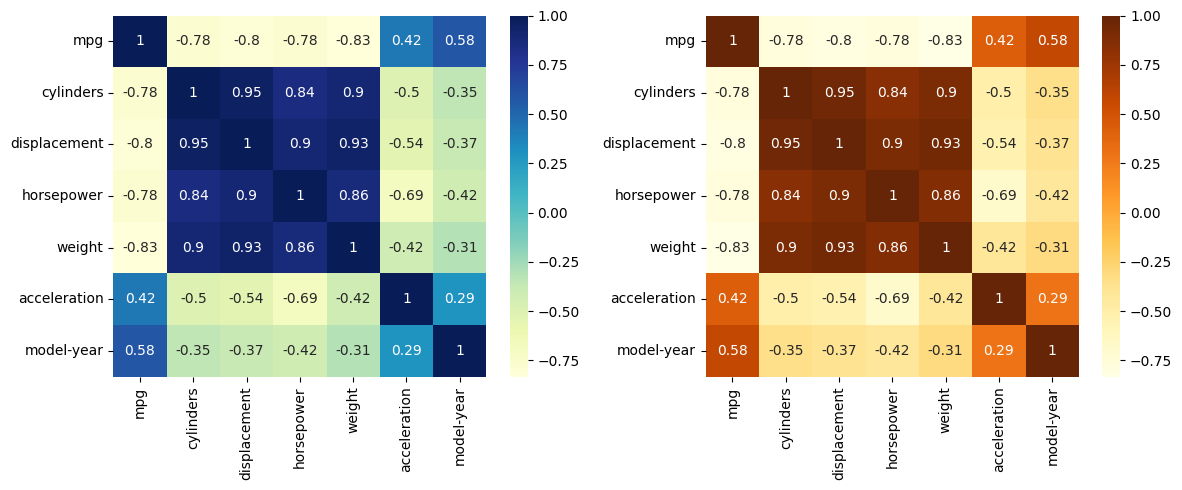

In [39]:
import seaborn as sns
fig = plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.subplot(1,2,2)
sns.heatmap(df.corr(), annot=True, cmap='YlOrBr')
plt.tight_layout()

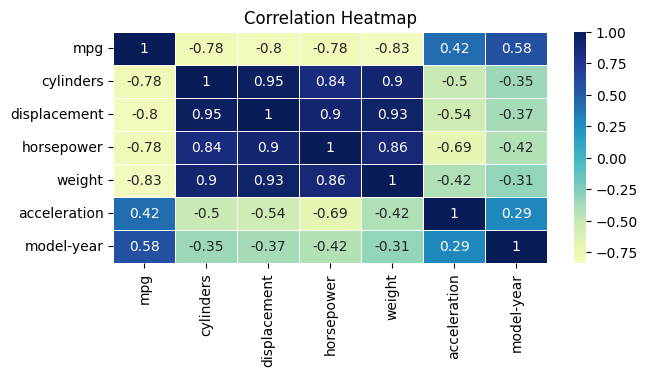

In [47]:
plt.figure(figsize=(7, 3))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", center=0, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [5]:
i = 1
print(f"el numero es {i:03}")

el numero es 001
